In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import balanced_accuracy_score, accuracy_score

In [ ]:
#now lets import the Auto regressor module from python
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import pacf,acf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/calendar.csv')
df2 = pd.read_csv('/content/drive/MyDrive/sales_train_validation.csv')
df3 = pd.read_csv('/content/drive/MyDrive/sell_prices.csv')
df4 = pd.read_csv('/content/drive/MyDrive/sales_train_evaluation.csv')

In [ ]:
df1

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
df2

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
df3

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [ ]:
df4

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


According to the evaluation dataframe we have to do the forecasting for the next 28 days i.e from 1914 to 1941

In [ ]:
print(df2['store_id'].unique())
print(df2['state_id'].unique())

['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
['CA' 'TX' 'WI']


In [ ]:
df2_new = df2[df2['store_id']=="CA_1"]
X1 = df2_new[df2_new['item_id']=="HOBBIES_1_001"]
X1

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1


# Price vs Sales

In [ ]:
X = df3[df3["store_id"]== "CA_2"]
X = X[X["item_id"]=="HOBBIES_1_001"]
X

,store_id,item_id,wm_yr_wk,sell_price
698412,CA_2,HOBBIES_1_001,11327,8.26
698413,CA_2,HOBBIES_1_001,11328,8.26
698414,CA_2,HOBBIES_1_001,11329,8.26
698415,CA_2,HOBBIES_1_001,11330,8.26
698416,CA_2,HOBBIES_1_001,11331,8.26
...,...,...,...,...
698559,CA_2,HOBBIES_1_001,11617,8.38
698560,CA_2,HOBBIES_1_001,11618,8.38
698561,CA_2,HOBBIES_1_001,11619,8.38
698562,CA_2,HOBBIES_1_001,11620,8.38


In [ ]:
X1 = df1[['wm_yr_wk','d']]
X1

,wm_yr_wk,d
0,11101,d_1
1,11101,d_2
2,11101,d_3
3,11101,d_4
4,11101,d_5
...,...,...
1964,11620,d_1965
1965,11620,d_1966
1966,11620,d_1967
1967,11621,d_1968


In [ ]:
Y = X1[X1['wm_yr_wk'].isin(X['wm_yr_wk'])]
Y

,wm_yr_wk,d
910,11327,d_911
911,11327,d_912
912,11327,d_913
913,11327,d_914
914,11327,d_915
...,...,...
1964,11620,d_1965
1965,11620,d_1966
1966,11620,d_1967
1967,11621,d_1968


In [ ]:
MD = Y.merge(X,on = "wm_yr_wk", how = "left")
MD

,wm_yr_wk,d,store_id,item_id,sell_price
0,11327,d_911,CA_2,HOBBIES_1_001,8.26
1,11327,d_912,CA_2,HOBBIES_1_001,8.26
2,11327,d_913,CA_2,HOBBIES_1_001,8.26
3,11327,d_914,CA_2,HOBBIES_1_001,8.26
4,11327,d_915,CA_2,HOBBIES_1_001,8.26
...,...,...,...,...,...
1054,11620,d_1965,CA_2,HOBBIES_1_001,8.38
1055,11620,d_1966,CA_2,HOBBIES_1_001,8.38
1056,11620,d_1967,CA_2,HOBBIES_1_001,8.38
1057,11621,d_1968,CA_2,HOBBIES_1_001,8.38


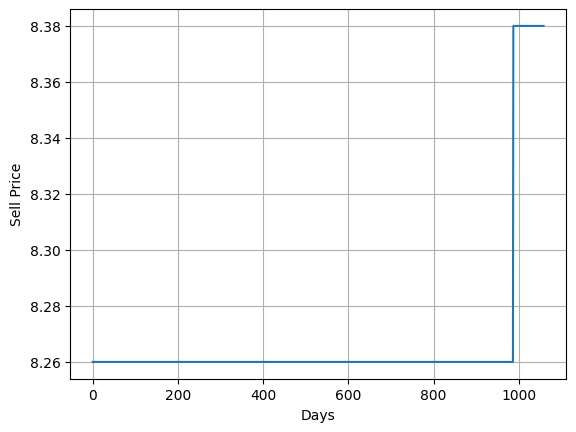

In [ ]:
x_values = range(len(MD['wm_yr_wk']))
fig, ax = plt.subplots()
ax.plot(x_values,MD['sell_price'])
ax.grid(True)
ax.set_xlabel("Days")
ax.set_ylabel("Sell Price")
plt.show()

In [ ]:
# Now forming the dataframe for number of sales on the above particular date. Id=> HOBBIES_1_001 and store_id -> CA_1
X2 = df2.iloc[0,6:]
X2

d_1       0
d_2       0
d_3       0
d_4       0
d_5       0
         ..
d_1909    1
d_1910    3
d_1911    0
d_1912    1
d_1913    1
Name: 0, Length: 1913, dtype: object

In [ ]:
X3 = pd.DataFrame(
    {
        'd': [col for col in X2.index],
        'Sales':[val for val in X2]
    }
)
X3

,d,Sales
0,d_1,0
1,d_2,0
2,d_3,0
3,d_4,0
4,d_5,0
...,...,...
1908,d_1909,1
1909,d_1910,3
1910,d_1911,0
1911,d_1912,1


In [ ]:
# again merging the dataset
MD1 = MD.merge(X3,on = "d", how = "left")
MD1

,wm_yr_wk,d,store_id,item_id,sell_price,Sales
0,11327,d_911,CA_2,HOBBIES_1_001,8.26,0.0
1,11327,d_912,CA_2,HOBBIES_1_001,8.26,0.0
2,11327,d_913,CA_2,HOBBIES_1_001,8.26,0.0
3,11327,d_914,CA_2,HOBBIES_1_001,8.26,0.0
4,11327,d_915,CA_2,HOBBIES_1_001,8.26,0.0
...,...,...,...,...,...,...
1054,11620,d_1965,CA_2,HOBBIES_1_001,8.38,NaN
1055,11620,d_1966,CA_2,HOBBIES_1_001,8.38,NaN
1056,11620,d_1967,CA_2,HOBBIES_1_001,8.38,NaN
1057,11621,d_1968,CA_2,HOBBIES_1_001,8.38,NaN


In [ ]:
# dropping the rows for particular
MD1.dropna(subset=['Sales'], inplace=True)
MD1

,wm_yr_wk,d,store_id,item_id,sell_price,Sales
0,11327,d_911,CA_2,HOBBIES_1_001,8.26,0.0
1,11327,d_912,CA_2,HOBBIES_1_001,8.26,0.0
2,11327,d_913,CA_2,HOBBIES_1_001,8.26,0.0
3,11327,d_914,CA_2,HOBBIES_1_001,8.26,0.0
4,11327,d_915,CA_2,HOBBIES_1_001,8.26,0.0
...,...,...,...,...,...,...
998,11612,d_1909,CA_2,HOBBIES_1_001,8.38,1.0
999,11612,d_1910,CA_2,HOBBIES_1_001,8.38,3.0
1000,11612,d_1911,CA_2,HOBBIES_1_001,8.38,0.0
1001,11613,d_1912,CA_2,HOBBIES_1_001,8.38,1.0


In [ ]:
MD2 = MD1.iloc[0:500,:]
MD2

,wm_yr_wk,d,store_id,item_id,sell_price,Sales
0,11327,d_911,CA_2,HOBBIES_1_001,8.26,0.0
1,11327,d_912,CA_2,HOBBIES_1_001,8.26,0.0
2,11327,d_913,CA_2,HOBBIES_1_001,8.26,0.0
3,11327,d_914,CA_2,HOBBIES_1_001,8.26,0.0
4,11327,d_915,CA_2,HOBBIES_1_001,8.26,0.0
...,...,...,...,...,...,...
495,11444,d_1406,CA_2,HOBBIES_1_001,8.26,1.0
496,11444,d_1407,CA_2,HOBBIES_1_001,8.26,1.0
497,11445,d_1408,CA_2,HOBBIES_1_001,8.26,1.0
498,11445,d_1409,CA_2,HOBBIES_1_001,8.26,0.0


Text(0, 0.5, 'Sales')

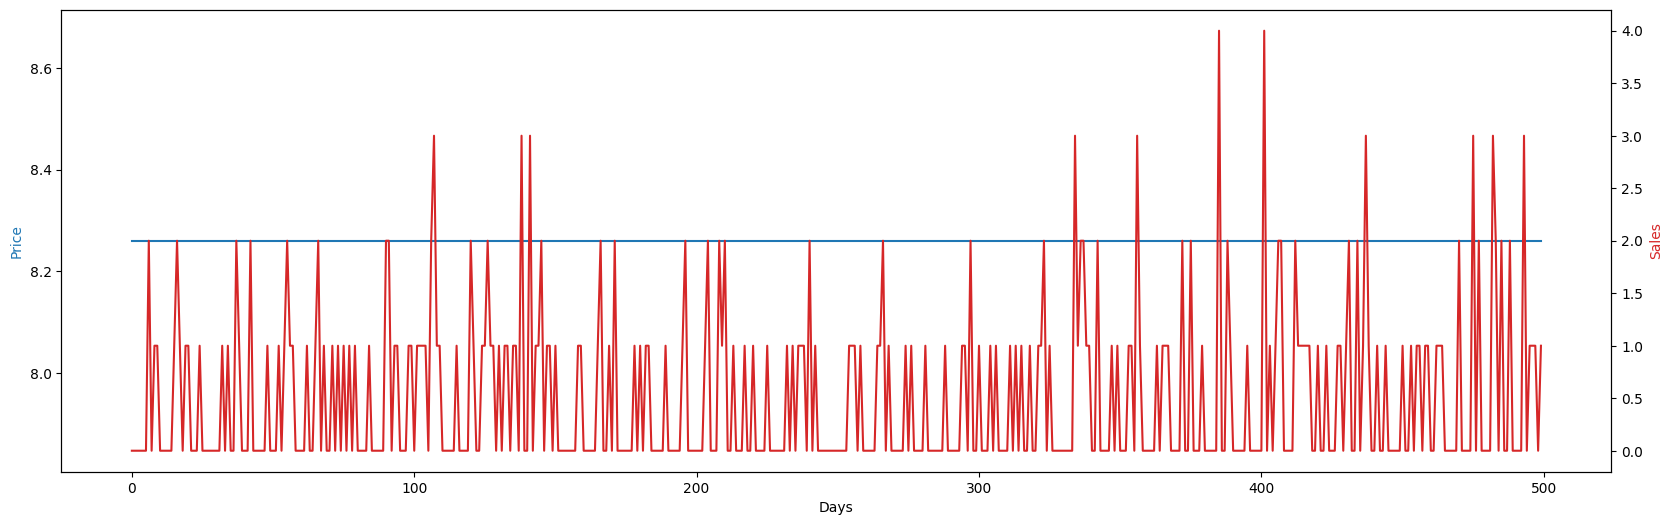

In [ ]:
x_values1 = range(len(MD2['d']))
fig1, ax1 = plt.subplots(figsize = (20,6))
ax1.plot(x_values1, MD2['sell_price'], color='tab:blue', label='Price')
ax1.set_xlabel('Days')
ax1.set_ylabel('Price', color='tab:blue')
ax2 = ax1.twinx()
ax2.plot(x_values1, MD2['Sales'], color='tab:red', label='Sales')
ax2.set_ylabel('Sales', color='tab:red')

# Sales Trend on the event day vs the normal day.


In [ ]:
X4 = df1.drop(columns = ['snap_CA','snap_WI','snap_TX'])
X4['isEvent1'] = X4['event_name_1'].apply(lambda x: 0 if pd.isna(x) else 1)
X4['isEvent2'] = X4['event_name_2'].apply(lambda x: 0 if pd.isna(x) else 1)
X4_new = X4.drop(columns = ['event_name_1','event_type_1','event_name_2','event_type_2'])
X4_new

,date,wm_yr_wk,weekday,wday,month,year,d,isEvent1,isEvent2
0,2011-01-29,11101,Saturday,1,1,2011,d_1,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,0,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,0,0
...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,0,0
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,0,0


In [ ]:
X3

,d,Sales
0,d_1,0
1,d_2,0
2,d_3,0
3,d_4,0
4,d_5,0
...,...,...
1908,d_1909,1
1909,d_1910,3
1910,d_1911,0
1911,d_1912,1


In [ ]:
#now again doing it for particular item id and store id.
# X3 is the day wise sales from store id = CA_1 and with the id = HOBBIES_1_001
#Merging the dataframe.
MD3 = X4_new.merge(X3, on = "d", how = 'right')
MD3_new = MD3.iloc[1000:1500,:]
MD3_new

,date,wm_yr_wk,weekday,wday,month,year,d,isEvent1,isEvent2,Sales
1000,2013-10-25,11339,Friday,7,10,2013,d_1001,0,0,2
1001,2013-10-26,11340,Saturday,1,10,2013,d_1002,0,0,2
1002,2013-10-27,11340,Sunday,2,10,2013,d_1003,0,0,0
1003,2013-10-28,11340,Monday,3,10,2013,d_1004,0,0,1
1004,2013-10-29,11340,Tuesday,4,10,2013,d_1005,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1495,2015-03-04,11505,Wednesday,5,3,2015,d_1496,0,0,0
1496,2015-03-05,11505,Thursday,6,3,2015,d_1497,1,0,0
1497,2015-03-06,11505,Friday,7,3,2015,d_1498,0,0,1
1498,2015-03-07,11506,Saturday,1,3,2015,d_1499,0,0,3


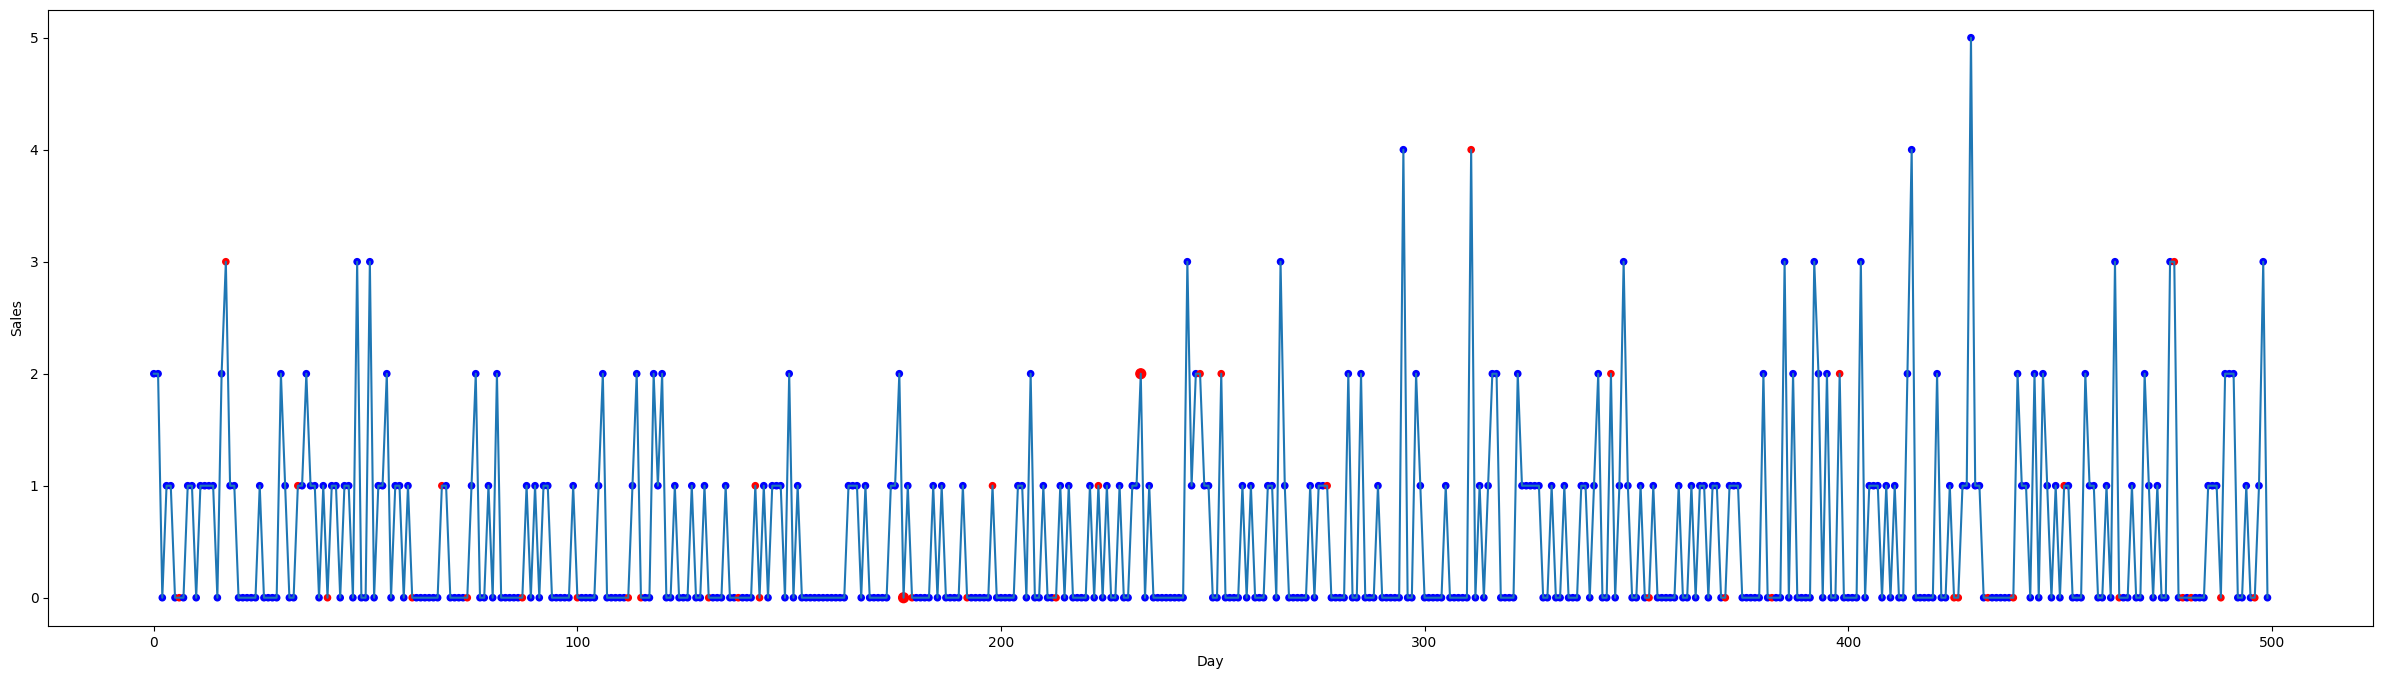

In [ ]:
x_values2 = range(len(MD3_new['d']))
colors =MD3_new['isEvent1'].map({0: 'blue', 1: 'red'})
size = MD3_new['isEvent2'].map({0: 20, 1: 50})
fig3, ax3 = plt.subplots(figsize = (30,8))
ax3.plot(x_values2,MD3_new['Sales'])
ax.set_xticks(x_values2)
ax.set_xticklabels(MD3_new['d'])
ax3.set_xlabel("Day")
ax3.set_ylabel("Sales")
ax3.scatter(x_values2,MD3_new['Sales'],c = colors, s = size)
ax.set_xticks(x_values2)
ax.set_xticklabels(MD3_new['d'])
plt.show()


# Graph is from the d_1001 to d_1500

# Total SKU sold in different store and state

In [ ]:
X6 = df2.drop(columns = ['id','item_id',	'dept_id','cat_id'])
X6

,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,CA_1,CA,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,CA_1,CA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CA_1,CA,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,CA_1,CA,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,CA_1,CA,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,WI_3,WI,0,0,2,2,0,3,1,4,...,2,0,0,0,0,0,1,0,0,1
30486,WI_3,WI,0,0,0,0,0,5,0,1,...,0,0,0,0,0,0,0,0,1,0
30487,WI_3,WI,0,6,0,2,2,4,1,8,...,2,1,0,2,0,1,0,0,1,0
30488,WI_3,WI,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
X7 = X6.drop(columns = ['store_id'])
X8 = X6.drop(columns = ['state_id'])
X7 = X7.groupby(['state_id']).sum()
X8 = X8.groupby(['store_id']).sum()
X7

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
state_id,,,,,,,,,,,,,,,,,,,,,
CA,14195,13805,10108,11047,9925,11322,12251,16610,14696,11822,...,16255,20564,23032,17052,15784,15148,14488,17095,21834,23187
TX,9438,9630,6778,7381,5912,9006,6226,9440,9376,7319,...,10800,12460,13709,9868,10922,9600,9602,10615,12266,12282
WI,8998,8314,6897,6984,3309,8883,9533,11882,8664,6431,...,14734,15338,14899,11139,10864,10595,10943,12807,14862,14326


In [ ]:
X8

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,3982,5437,5954,4345,3793,3722,3709,4387,5577,6113
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,4440,5352,5760,3830,3631,3691,3303,4457,5884,6082
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,5337,6936,8271,6068,5683,5235,5018,5623,7419,7721
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2496,2839,3047,2809,2677,2500,2458,2628,2954,3271
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3084,3724,4192,3410,3257,2901,2776,3022,3700,4033
TX_2,3852,3937,2731,2954,2492,3439,2588,3772,3657,2932,...,3897,4475,4998,3311,3727,3384,3446,3902,4483,4292
TX_3,3030,3006,2225,2169,1726,2833,1947,2848,2832,2213,...,3819,4261,4519,3147,3938,3315,3380,3691,4083,3957
WI_1,2704,2194,1562,1251,2,2049,2815,3248,1674,1355,...,3862,4862,4812,3236,3069,3242,3324,3991,4772,4874
WI_2,2256,1922,2018,2522,1175,2244,2232,2643,2140,1836,...,6259,5579,5566,4347,4464,4194,4393,4988,5404,5127


In [ ]:
X7['state_id'] = ['CA','TX','WI']
melted_df1 = pd.melt(X7,id_vars = 'state_id',var_name = 'Date',value_name = "Sales")
fig = px.line(melted_df1, x='Date', y='Sales', color='state_id', title='Sales Time Series by State')
fig.show()

In [ ]:
X8['store_id'] = ['CA1','CA2','CA3','CA4','TX1','TX2','TX3','WI1','WI2','WI3']
melted_df2 = pd.melt(X8,id_vars = 'store_id',var_name = 'Date',value_name = "Sales")
fig1 = px.line(melted_df2, x='Date', y='Sales', color='store_id', title='Sales Time Series by Store')
fig1.show()

16/10/23

In [ ]:
print(df2['cat_id'].unique())
print(df2['dept_id'].unique())

['HOBBIES' 'HOUSEHOLD' 'FOODS']
['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']


In [ ]:
X11 = df2.drop(columns = ['id','item_id'])
X11 = X11[X11['state_id']=='CA']
X11 = X11[X11['store_id']=='CA_1']
X11

,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,FOODS_3,FOODS,CA_1,CA,0,0,0,0,0,0,...,4,0,2,1,0,2,0,4,1,1
3045,FOODS_3,FOODS,CA_1,CA,1,0,5,0,0,3,...,1,0,0,0,1,0,2,2,1,0
3046,FOODS_3,FOODS,CA_1,CA,0,0,0,0,0,0,...,1,2,0,0,1,1,0,1,3,2
3047,FOODS_3,FOODS,CA_1,CA,0,0,0,0,0,0,...,1,0,4,0,2,0,0,3,2,0


In [ ]:
# let's fix the time period of 1 year
X11 = X11.iloc[:,:369]
X11

,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
0,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
4,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,FOODS_3,FOODS,CA_1,CA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3045,FOODS_3,FOODS,CA_1,CA,1,0,5,0,0,3,...,0,0,3,1,1,0,0,1,0,2
3046,FOODS_3,FOODS,CA_1,CA,0,0,0,0,0,0,...,5,1,2,2,2,3,1,1,1,1
3047,FOODS_3,FOODS,CA_1,CA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's plot the graph for different cat_id sales from store CA_1 in state CA.
X12 = X11.drop(columns = ['dept_id','store_id','state_id'])
X12 = X12.groupby(['cat_id']).sum()
X12['cat_id'] = ['FOODS','HOBBIES','HOUSEHOLD']
X12

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,cat_id
cat_id,,,,,,,,,,,,,,,,,,,,,
FOODS,3239,3137,2008,2258,2032,2407,2693,3962,3418,2446,...,2447,3766,3054,1969,1947,1788,1805,2506,3082,FOODS
HOBBIES,556,498,415,392,268,467,346,769,432,384,...,291,574,373,316,285,296,499,456,494,HOBBIES
HOUSEHOLD,542,520,393,401,330,402,411,706,490,327,...,415,767,538,393,339,376,376,482,665,HOUSEHOLD


In [ ]:
melted_df3 = pd.melt(X12,id_vars = 'cat_id',var_name = 'Date', value_name = 'Sales')
melted_df3

,cat_id,Date,Sales
0,FOODS,d_1,3239
1,HOBBIES,d_1,556
2,HOUSEHOLD,d_1,542
3,FOODS,d_2,3137
4,HOBBIES,d_2,498
...,...,...,...
1090,HOBBIES,d_364,456
1091,HOUSEHOLD,d_364,482
1092,FOODS,d_365,3082
1093,HOBBIES,d_365,494


In [ ]:
fig3 = px.line(melted_df3, x='Date', y='Sales', color='cat_id', title='Sales Time Series by Category in store CA_1 and state CA')
fig3.show()

In [ ]:
X13 = X11.drop(columns = ['cat_id','store_id','state_id'])
X13 = X13.groupby(['dept_id']).sum()
X13['dept_id'] = ['HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2','FOODS_1','FOODS_2','FOODS_3']
X13

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,dept_id
dept_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1,297,284,214,175,182,191,224,263,245,176,...,203,307,251,152,189,215,233,292,352,HOBBIES_1
FOODS_2,674,655,396,476,354,486,554,747,581,559,...,456,747,497,437,356,321,353,396,593,HOBBIES_2
FOODS_3,2268,2198,1398,1607,1496,1730,1915,2952,2592,1711,...,1788,2712,2306,1380,1402,1252,1219,1818,2137,HOUSEHOLD_1
HOBBIES_1,528,489,409,383,263,453,339,750,425,375,...,279,562,367,310,276,273,477,446,470,HOUSEHOLD_2
HOBBIES_2,28,9,6,9,5,14,7,19,7,9,...,12,12,6,6,9,23,22,10,24,FOODS_1
HOUSEHOLD_1,361,350,279,278,195,256,268,517,343,225,...,305,545,386,282,245,272,263,345,477,FOODS_2
HOUSEHOLD_2,181,170,114,123,135,146,143,189,147,102,...,110,222,152,111,94,104,113,137,188,FOODS_3


In [ ]:
melted_df4 = pd.melt(X13,id_vars = 'dept_id',var_name = 'Date', value_name = 'Sales')
melted_df4

,dept_id,Date,Sales
0,HOBBIES_1,d_1,297
1,HOBBIES_2,d_1,674
2,HOUSEHOLD_1,d_1,2268
3,HOUSEHOLD_2,d_1,528
4,FOODS_1,d_1,28
...,...,...,...
2550,HOUSEHOLD_1,d_365,2137
2551,HOUSEHOLD_2,d_365,470
2552,FOODS_1,d_365,24
2553,FOODS_2,d_365,477


In [ ]:
fig4 = px.line(melted_df4, x='Date', y='Sales', color='dept_id', title='Sales Time Series by department in store CA_1 and state CA')
fig4.show()

# Prediction using AR model

In [ ]:
df4_new = df4[df4['store_id']=="CA_2"]
X2 = df4_new[df4_new['item_id']=="HOBBIES_1_001"]
X2

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
3049,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,...,2,0,2,0,2,2,0,2,0,1


In [ ]:
df_model = pd.melt(X2, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()
df_model

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold
0,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_1,0
1,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_2,0
2,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_3,0
3,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_4,0
4,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_5,0
...,...,...,...,...,...,...,...,...
1936,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_1937,2
1937,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_1938,0
1938,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_1939,2
1939,HOBBIES_1_001_CA_2_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,d_1940,0


In [ ]:
X = df_model[['d','sold']]
X

,d,sold
0,d_1,0
1,d_2,0
2,d_3,0
3,d_4,0
4,d_5,0
...,...,...
1936,d_1937,2
1937,d_1938,0
1938,d_1939,2
1939,d_1940,0


In [ ]:
# as from d_1 to d_910 all sales are zero.
X_new = X.iloc[910:,:]
X_new

,d,sold
910,d_911,1
911,d_912,0
912,d_913,1
913,d_914,0
914,d_915,0
...,...,...
1936,d_1937,2
1937,d_1938,0
1938,d_1939,2
1939,d_1940,0


In [ ]:
X_new_train = X_new.iloc[0:1003,]
X_new_test = X_new.iloc[1003:,]
X_new_train

,d,sold
910,d_911,1
911,d_912,0
912,d_913,1
913,d_914,0
914,d_915,0
...,...,...
1908,d_1909,4
1909,d_1910,0
1910,d_1911,0
1911,d_1912,2


In [ ]:
X_new_test

,d,sold
1913,d_1914,0
1914,d_1915,1
1915,d_1916,0
1916,d_1917,1
1917,d_1918,2
1918,d_1919,0
1919,d_1920,0
1920,d_1921,2
1921,d_1922,0
1922,d_1923,0


USING INBUILT LIBRARY
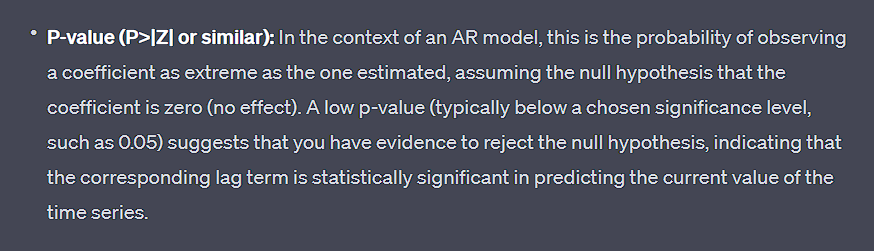

In [ ]:
model_inbuilt_ar = AutoReg(X_new_train['sold'].values, lags = 30,).fit()
print(model_inbuilt_ar.summary())
# to check the p-value <0.05 most of the time are significant that lags are need to be taken only

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1003
Model:                    AutoReg(30)   Log Likelihood               -1220.580
Method:               Conditional MLE   S.D. of innovations              0.848
Date:                Thu, 07 Dec 2023   AIC                           2505.159
Time:                        13:08:26   BIC                           2661.331
Sample:                            30   HQIC                          2564.594
                                 1003                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4260      0.096      4.448      0.000       0.238       0.614
y.L1          -0.0126      0.032     -0.395      0.693      -0.075       0.050
y.L2          -0.0295      0.032     -0.920      0.3

In [ ]:
model_inbuilt_ma = sm.tsa.ARIMA(X_new_train['sold'].values, order= (0,0,30)).fit()
print(model_inbuilt_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1003
Model:                ARIMA(0, 0, 30)   Log Likelihood               -1251.493
Date:                Thu, 07 Dec 2023   AIC                           2566.985
Time:                        13:08:50   BIC                           2724.129
Sample:                             0   HQIC                          2626.702
                               - 1003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5396      0.045     11.945      0.000       0.451       0.628
ma.L1         -0.0162      0.035     -0.464      0.643      -0.085       0.052
ma.L2         -0.0157      0.036     -0.438      0.6

In [ ]:
fig = px.line(X,x = "d", y = "sold")
fig

In [ ]:
fig1 = px.line(X_new,x = "d", y = "sold")
fig1

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or non-stationary. Stationarity is an important concept in time series analysis because many time series forecasting methods and models assume that the data is stationary. A stationary time series is one where statistical properties such as the mean, variance, and autocorrelation structure do not change over time. Non-stationary time series, on the other hand, exhibit statistical properties that change over time

In [ ]:
X1 = X_new['sold'].values
result = adfuller(X1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Non-Stationary")


ADF Statistic: -32.642290
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Time Series is Stationary


In [ ]:
print(len(X1))

1031


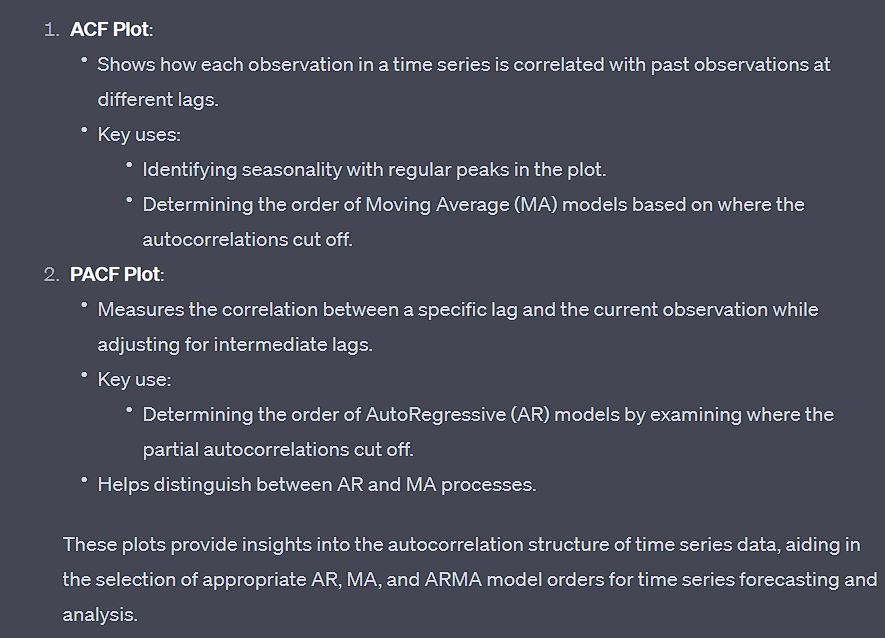

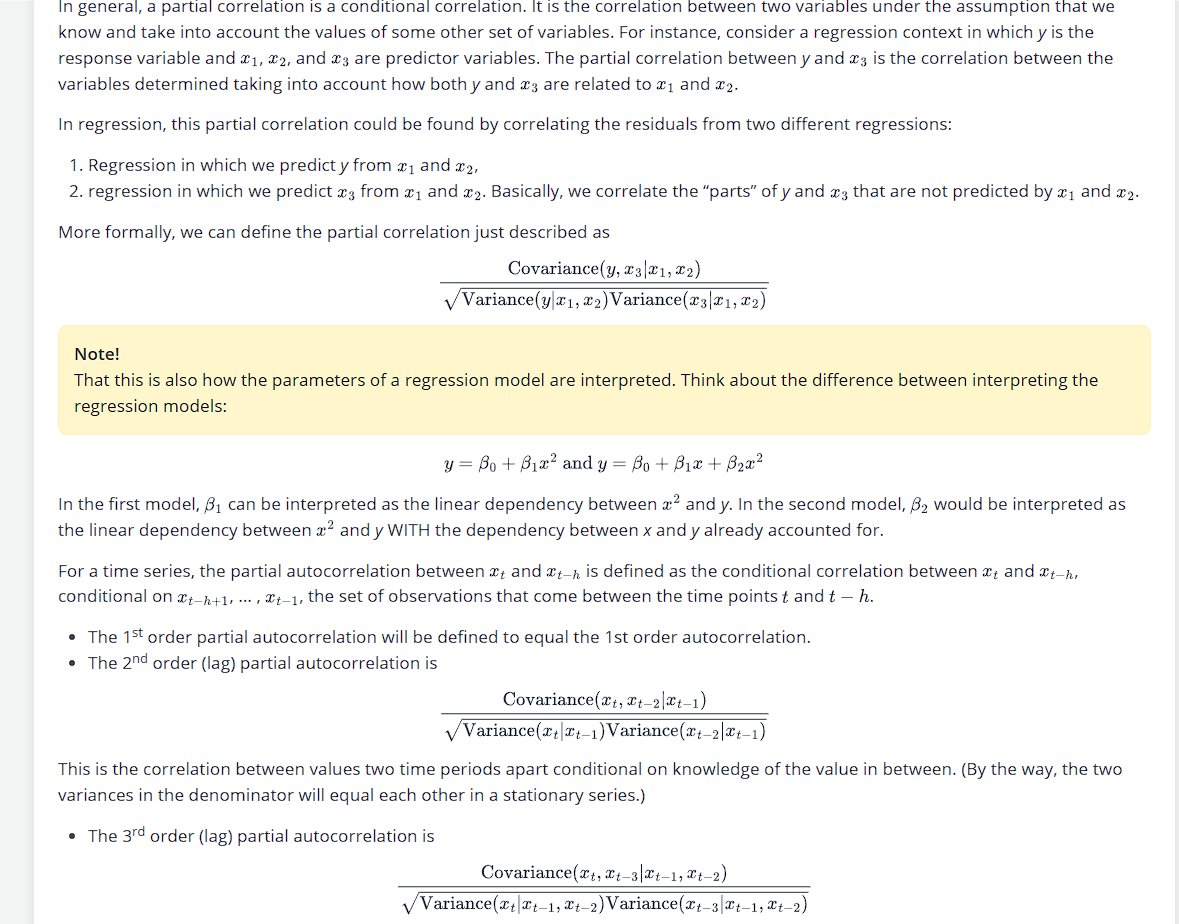

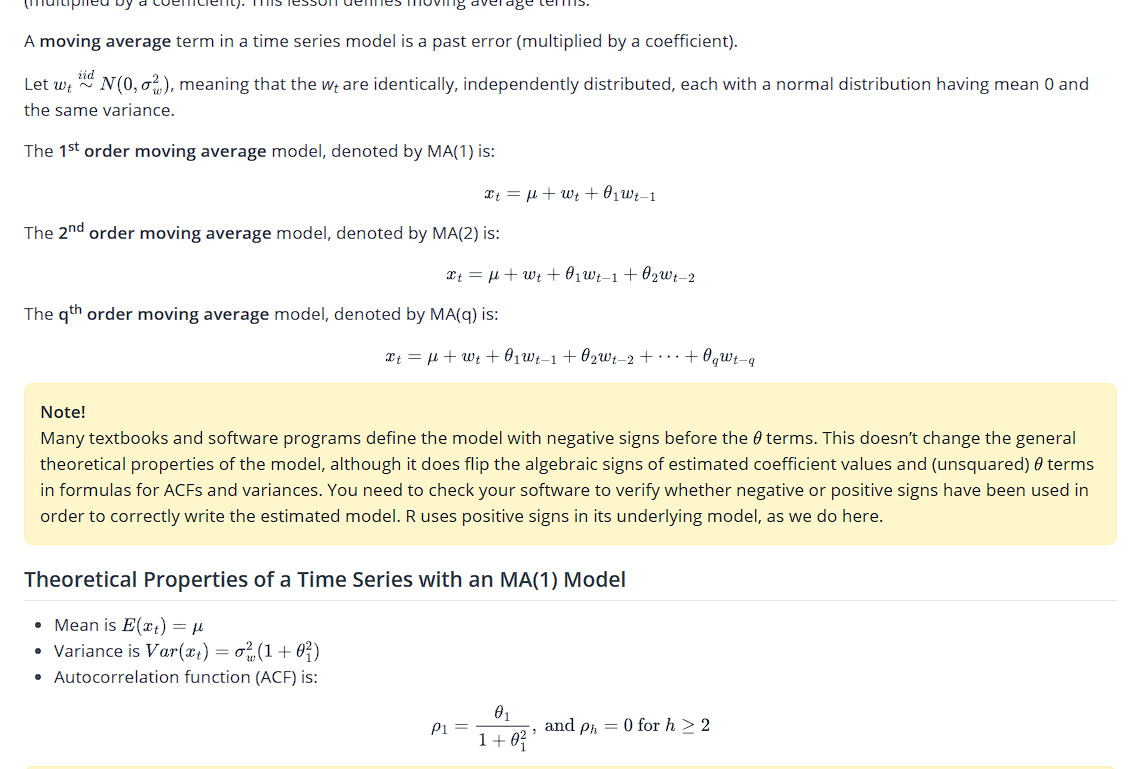

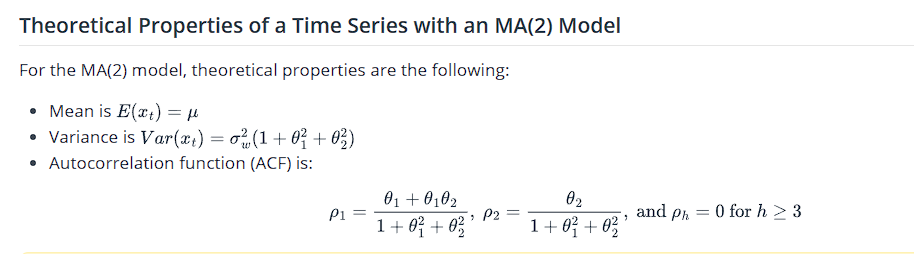

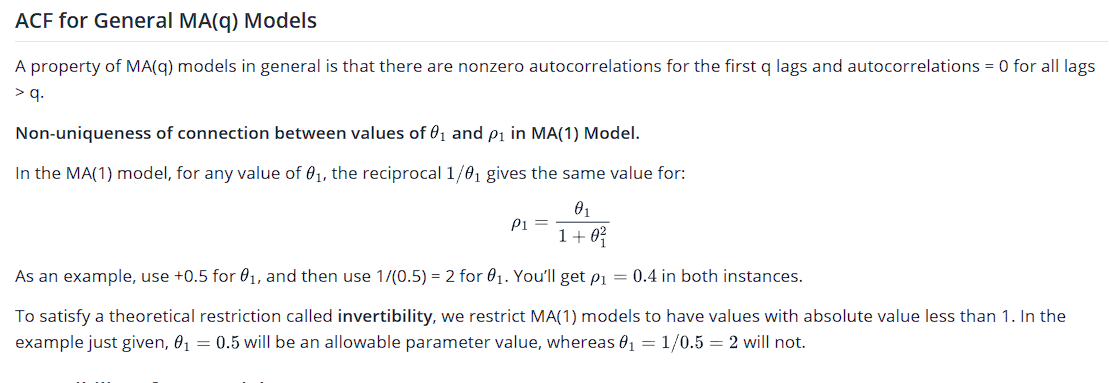

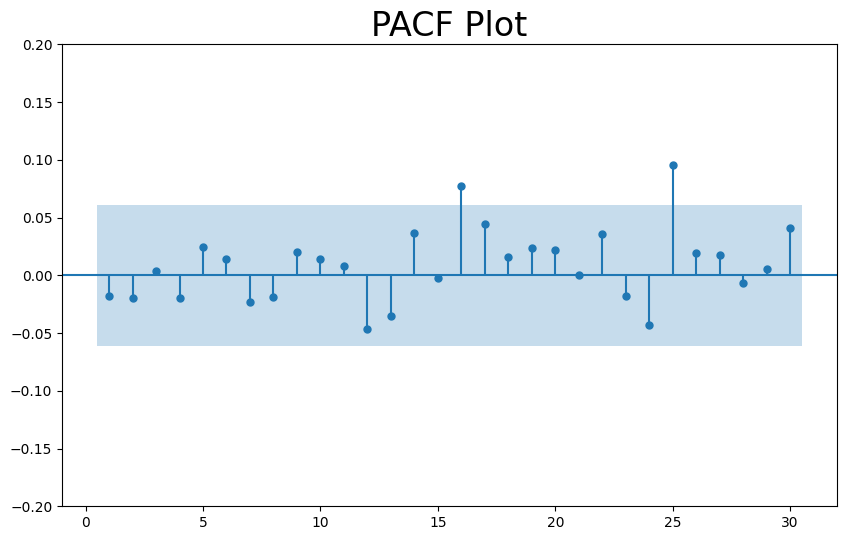

In [ ]:
lags = 30
acf_fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(X1, lags=lags, zero  = False, ax=ax)
ax.set_title("PACF Plot", size=24)
ax.set_ylim(-0.2, 0.2)
plt.show()

In [ ]:
# now to get the lags at which there is the significant values of pacf and acf.
#pacf_values, conf_int = pacf(X1, nlags = (len(X1)//2)-1, alpha = 0.05)
pacf_values, conf_int = pacf(X1, nlags = 30, alpha = 0.05)
# now setting the significanc level (e.g. 0.05 for 95% confidence interval) generally we take this only
significant_lags_pacf1 = np.where(np.abs(pacf_values)> 0.05)[0]
significant_lags_pacf = significant_lags_pacf1[1:]
significant_lags_pacf

array([16, 25])

In [ ]:
#Now let's create the lagged Dataframe
lagged_data = pd.concat([X_new['sold'].shift(lag) for lag in range (1,max(significant_lags_pacf)+1)], axis = 1)
lagged_data.columns = [f'Lag_{lag}' for lag in range (1,max(significant_lags_pacf)+1)]
lagged_data_dropped = lagged_data.dropna()
lagged_data_dropped

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,...,Lag_16,Lag_17,Lag_18,Lag_19,Lag_20,Lag_21,Lag_22,Lag_23,Lag_24,Lag_25
935,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
936,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
937,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
938,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,...,2.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,2.0
1937,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0
1938,0.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0
1939,2.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0


In [ ]:
# now to construct the AR model we need to use the significant lags only therefore.
df_model_final = lagged_data_dropped[[f'Lag_{lag}' for lag in significant_lags_pacf]]
df_model_final

,Lag_16,Lag_25
935,0.0,1.0
936,1.0,0.0
937,0.0,1.0
938,0.0,0.0
939,0.0,0.0
...,...,...
1936,2.0,2.0
1937,0.0,2.0
1938,0.0,0.0
1939,0.0,1.0


In [ ]:
m = len((df_model_final.iloc[:,0]).values)
n = m - 28

In [ ]:
df_model_train = df_model_final.iloc[0:n,]
df_model_test = df_model_final.iloc[n:,]
df_model_train

,Lag_16,Lag_25
935,0.0,1.0
936,1.0,0.0
937,0.0,1.0
938,0.0,0.0
939,0.0,0.0
...,...,...
1908,2.0,3.0
1909,0.0,0.0
1910,0.0,0.0
1911,0.0,3.0


In [ ]:
df_model_test

,Lag_16,Lag_25
1913,0.0,0.0
1914,1.0,1.0
1915,0.0,1.0
1916,0.0,0.0
1917,1.0,2.0
1918,0.0,0.0
1919,0.0,0.0
1920,0.0,0.0
1921,1.0,0.0
1922,2.0,0.0


In [ ]:
y_train = X['sold'].iloc[935:1913] # see thr 935 from df_model_train
y_test = X['sold'].iloc[1913:]
print(len(y_train))
print(len(y_test))

978
28


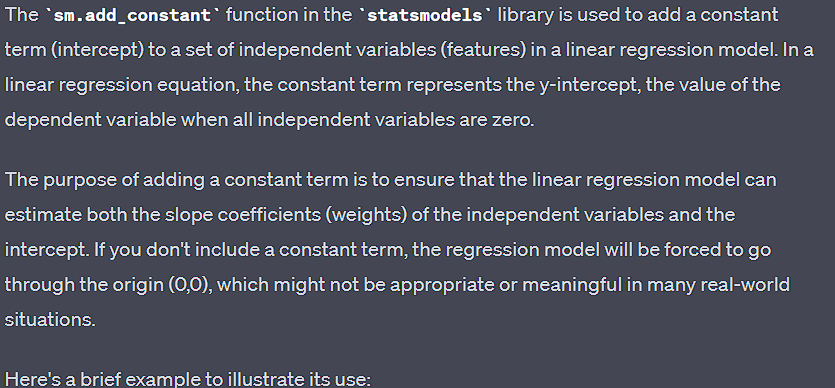

In [ ]:
# now using the oridnary least squares method to compute the coefficients of the lags
model = sm.OLS(y_train,sm.add_constant(df_model_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   sold   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.215
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           0.000775
Time:                        13:08:50   Log-Likelihood:                -1235.2
No. Observations:                 978   AIC:                             2476.
Df Residuals:                     975   BIC:                             2491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4530      0.036     12.411      0.0

In [ ]:
y_train_pred = model.predict(sm.add_constant(df_model_train))
y_test_pred = model.predict(sm.add_constant(df_model_test))
y_train_pred

935     0.547084
936     0.528082
937     0.547084
938     0.452952
939     0.452952
          ...   
1908    0.885607
1909    0.452952
1910    0.452952
1911    0.735348
1912    0.547084
Length: 978, dtype: float64

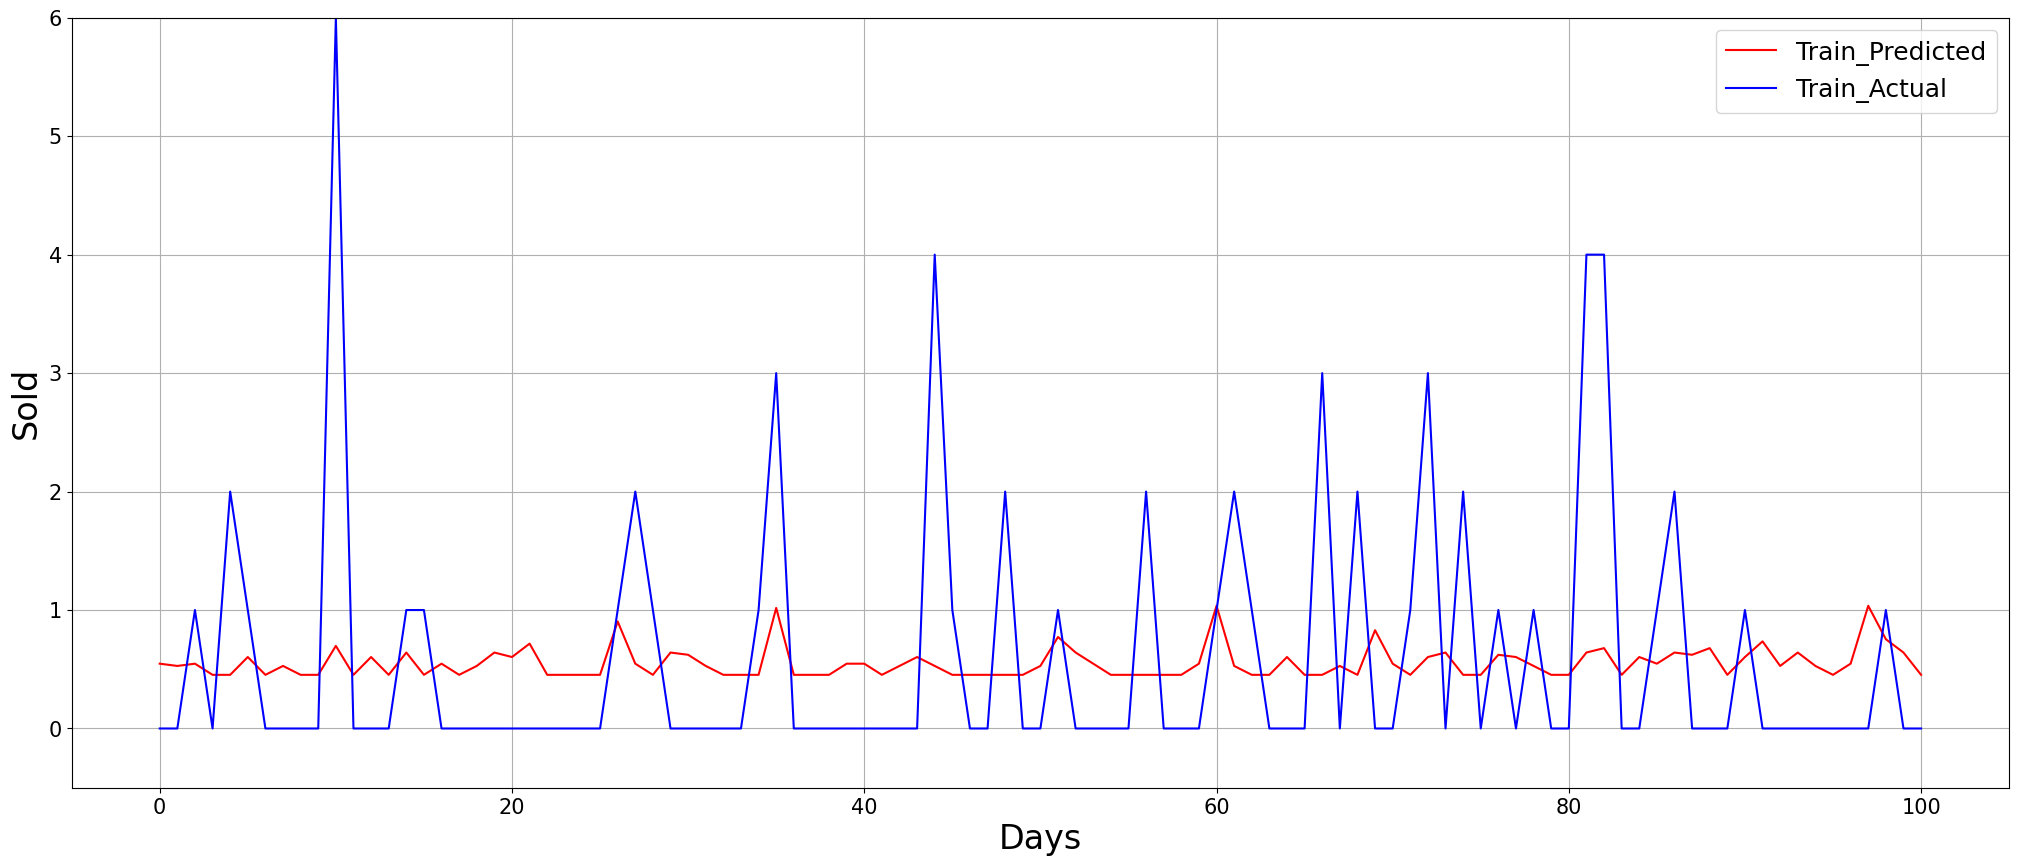

In [ ]:
x_range = range(len(y_train_pred[0:101]))
plt.figure(figsize = (25,10))
plt.plot(x_range[0:101],y_train_pred[0:101], color = "red", label = "Train_Predicted")
plt.plot(x_range,y_train[0:101], color = "blue", label = "Train_Actual")
plt.grid(True)
plt.legend(loc = "upper right",fontsize = "18")
plt.xlabel("Days", size = "24")
plt.ylabel('Sold',size = "24")
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.ylim(-0.5,6)
plt.show()

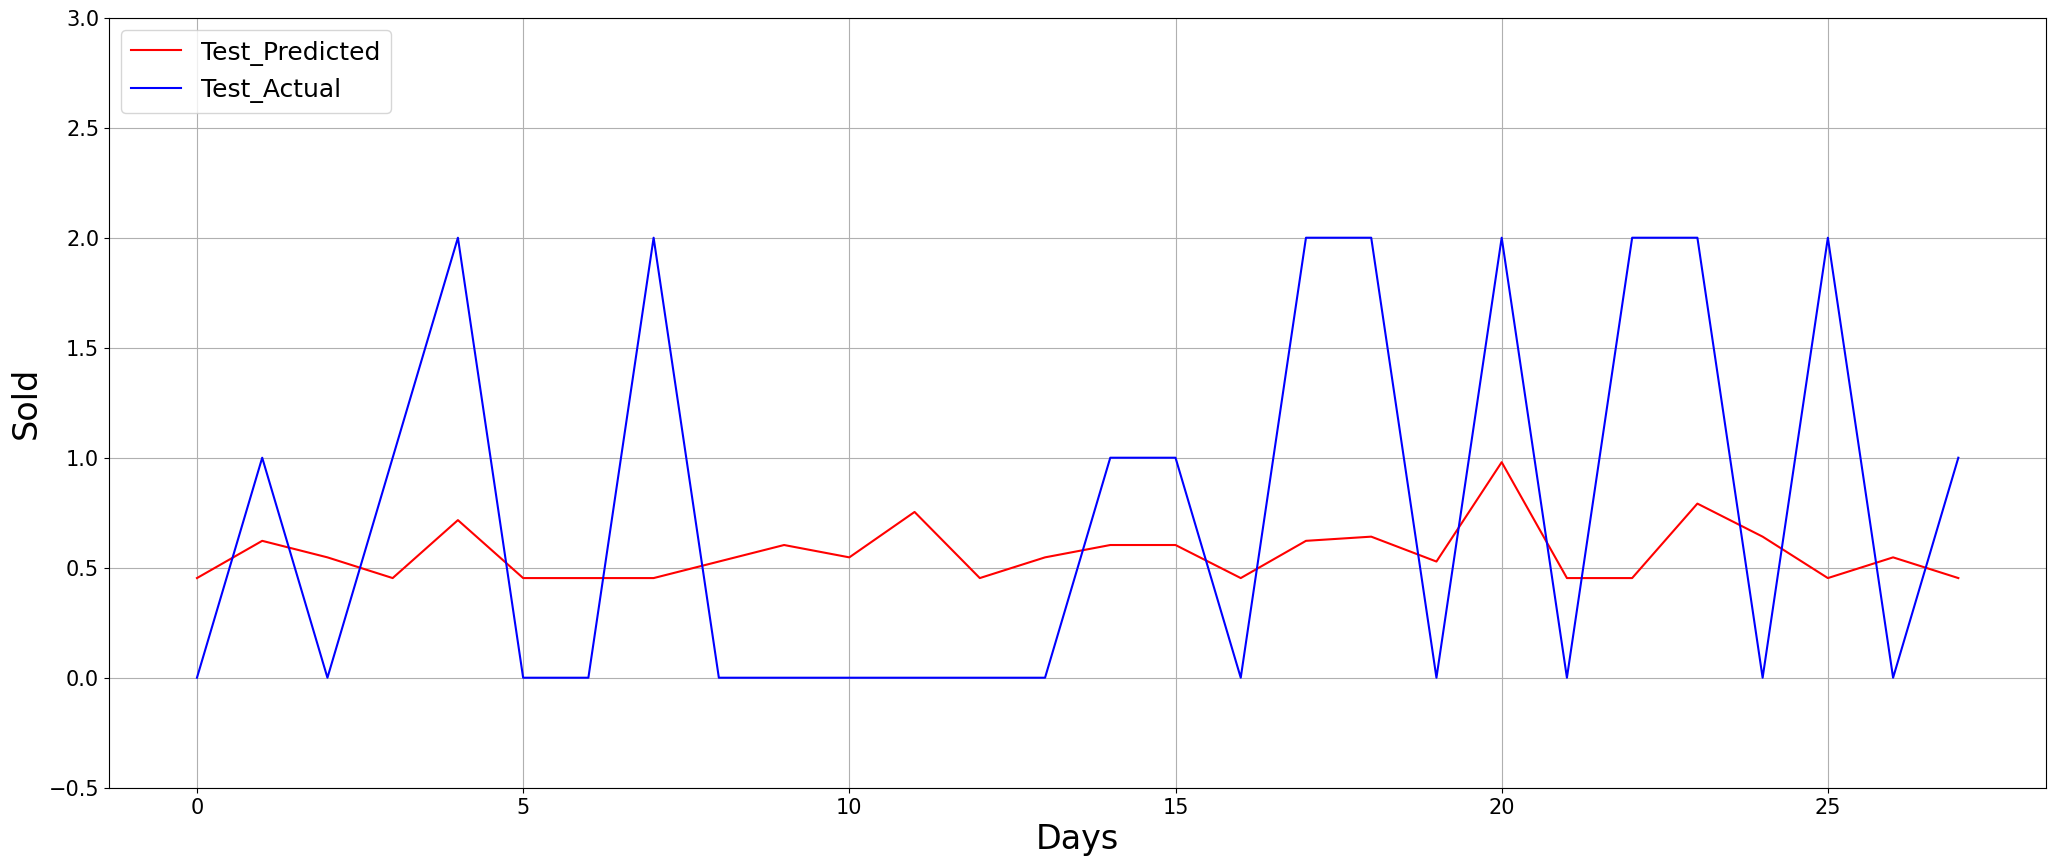

In [ ]:
x_range1 = range(len(y_test_pred))
plt.figure(figsize = (25,10))
plt.plot(x_range1,y_test_pred, color = "red", label = "Test_Predicted")
plt.plot(x_range1,y_test, color = "blue", label = "Test_Actual")
plt.grid(True)
plt.legend(loc = "upper left",fontsize = "18")
plt.xlabel("Days", size = "24")
plt.ylabel('Sold',size = "24")
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.ylim(-0.5,3)
plt.show()

In [ ]:
rmse_ar_train = sqrt(mean_squared_error(y_train_pred,y_train))
rmse_ar_test = sqrt(mean_squared_error(y_test_pred,y_test))
mse_ar_train = mean_squared_error(y_train_pred,y_train)
mse_ar_test = mean_squared_error(y_test_pred,y_test)
mae_ar_train = mean_absolute_error(y_train_pred,y_train)
mae_ar_test = mean_absolute_error(y_test_pred,y_test)
print(rmse_ar_train)
print(rmse_ar_test)
print(mse_ar_train)
print(mse_ar_test)
print(mae_ar_train)
print(mae_ar_test)

0.8556394860078133
0.8547911168421726
0.7321189300157149
0.7306678534322888
0.681134863061474
0.7541330605266611


# Prediction using MA

---
While calculating the coefficients using the OLS the model structure appears to
be same as Moving Average model.



Using the MA model inbuilt library

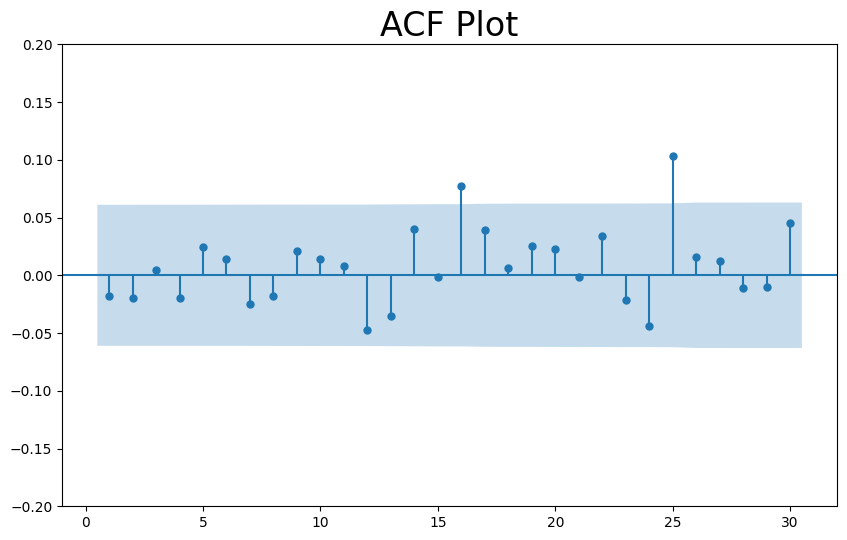

In [ ]:
lags = 30
acf_fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(X1, lags=lags, zero  = False, ax=ax)
ax.set_title("ACF Plot", size=24)
ax.set_ylim(-0.2, 0.2)
plt.show()


In [ ]:
#acf_values,conf_int = acf(X1, nlags = len(X1)-1, alpha = 0.05)
acf_values,conf_int = acf(X1, nlags = 100, alpha = 0.05)
# now setting the significanc level (e.g. 0.05 for 95% confidence interval) generally we take this only
significant_lags_acf1 = np.where(np.abs(acf_values)> 0.05)[0]
significant_lags_acf = significant_lags_acf1[1:]
significant_lags_acf

array([16, 25, 34, 38, 46, 61, 70, 79, 88])

In [ ]:
# so to get the residuals first we need to fit the base line model.
# so we are using the predicted values of the above AR model to calculate the residuals
X_new_ma = X_new_train.copy()
X_new_ma['Predicted'] = y_train_pred
X_new_ma = X_new_ma.dropna()
X_new_ma1 = X_new.iloc[1912-910+1:,]
X_new_ma1['Predicted'] = y_test_pred
X_new_ma_final = pd.concat([X_new_ma,X_new_ma1], ignore_index = True)
X_new_ma_final

<ipython-input-68-30166eceaa64>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,d,sold,Predicted
0,d_936,0,0.547084
1,d_937,0,0.528082
2,d_938,1,0.547084
3,d_939,0,0.452952
4,d_940,2,0.452952
...,...,...,...
1001,d_1937,2,0.791475
1002,d_1938,0,0.641216
1003,d_1939,2,0.452952
1004,d_1940,0,0.547084


In [ ]:
X_new_ma_final.isna().sum()

d            0
sold         0
Predicted    0
dtype: int64

In [ ]:
X_new_ma_final['Residuals'] = (X_new_ma_final['sold'].values  - X_new_ma_final['Predicted'].values)
X_new_ma_final

,d,sold,Predicted,Residuals
0,d_936,0,0.547084,-0.547084
1,d_937,0,0.528082,-0.528082
2,d_938,1,0.547084,0.452916
3,d_939,0,0.452952,-0.452952
4,d_940,2,0.452952,1.547048
...,...,...,...,...
1001,d_1937,2,0.791475,1.208525
1002,d_1938,0,0.641216,-0.641216
1003,d_1939,2,0.452952,1.547048
1004,d_1940,0,0.547084,-0.547084


In [ ]:
X_new_ma_final = X_new_ma_final[['d','Residuals']]
X_new_ma_final

,d,Residuals
0,d_936,-0.547084
1,d_937,-0.528082
2,d_938,0.452916
3,d_939,-0.452952
4,d_940,1.547048
...,...,...
1001,d_1937,1.208525
1002,d_1938,-0.641216
1003,d_1939,1.547048
1004,d_1940,-0.547084


In [ ]:
# lets have the adfuller test first
X_ma = X_new_ma_final['Residuals'].values
result = adfuller(X_ma)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Non-Stationary")

ADF Statistic: -32.150541
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Time Series is Stationary


In [ ]:
model_inbuilt_ma = sm.tsa.ARIMA(X_ma, order= (30,0,0)).fit()
print(model_inbuilt_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1006
Model:                ARIMA(30, 0, 0)   Log Likelihood               -1261.951
Date:                Thu, 07 Dec 2023   AIC                           2587.901
Time:                        13:09:10   BIC                           2745.141
Sample:                             0   HQIC                          2647.646
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.044      0.134      0.893      -0.080       0.091
ar.L1         -0.0155      0.035     -0.441      0.659      -0.084       0.053
ar.L2         -0.0255      0.035     -0.724      0.4

In [ ]:
# Now we will prepare the AR model for this regressor.
acf_values_ma, conf_int = acf(X_ma, nlags = 30, alpha = 0.05)
# now setting the significanc level (e.g. 0.05 for 95% confidence interval) generally we take this only
significant_lags_acf_ma1 = np.where(np.abs(acf_values_ma)> 0.05)[0]
significant_lags_acf_ma = significant_lags_acf_ma1[0:]
significant_lags_acf_ma

array([ 0, 17])

In [ ]:
#Now let's create the lagged Dataframe
#lagged_data_ma = pd.concat([X_new_ma_final['Residuals'].shift(lag) for lag in range (0,max(significant_lags_acf_ma)+1)], axis = 1)
lagged_data_ma = pd.concat([X_new_ma_final['Residuals'].shift(lag) for lag in range (0,26)], axis = 1)
#lagged_data_ma.columns = [f'Lag1_{lag}' for lag in range (0,max(significant_lags_acf_ma)+1)]
lagged_data_ma.columns = [f'Lag1_{lag}' for lag in range (0,26)]
lagged_data_ma['d'] = X_new_ma_final['d'].values
lagged_data_dropped_ma = lagged_data_ma.dropna()
lagged_data_dropped_ma

,Lag1_0,Lag1_1,Lag1_2,Lag1_3,Lag1_4,Lag1_5,Lag1_6,Lag1_7,Lag1_8,Lag1_9,...,Lag1_17,Lag1_18,Lag1_19,Lag1_20,Lag1_21,Lag1_22,Lag1_23,Lag1_24,Lag1_25,d
25,-0.452952,-0.452952,-0.452952,-0.452952,-0.716346,-0.603212,-0.641216,-0.528082,-0.452952,-0.547084,...,-0.452952,-0.528082,-0.452952,0.396788,1.547048,-0.452952,0.452916,-0.528082,-0.547084,d_961
26,0.096270,-0.452952,-0.452952,-0.452952,-0.452952,-0.716346,-0.603212,-0.641216,-0.528082,-0.452952,...,-0.452952,-0.452952,-0.528082,-0.452952,0.396788,1.547048,-0.452952,0.452916,-0.528082,d_962
27,1.452916,0.096270,-0.452952,-0.452952,-0.452952,-0.452952,-0.716346,-0.603212,-0.641216,-0.528082,...,5.302656,-0.452952,-0.452952,-0.528082,-0.452952,0.396788,1.547048,-0.452952,0.452916,d_963
28,0.547048,1.452916,0.096270,-0.452952,-0.452952,-0.452952,-0.452952,-0.716346,-0.603212,-0.641216,...,-0.452952,5.302656,-0.452952,-0.452952,-0.528082,-0.452952,0.396788,1.547048,-0.452952,d_964
29,-0.641216,0.547048,1.452916,0.096270,-0.452952,-0.452952,-0.452952,-0.452952,-0.716346,-0.603212,...,-0.603212,-0.452952,5.302656,-0.452952,-0.452952,-0.528082,-0.452952,0.396788,1.547048,d_965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,1.208525,1.547048,-0.452952,1.020261,-0.528082,1.358784,1.377786,-0.452952,0.396788,0.396788,...,-0.452952,-0.452952,1.283654,0.547048,-0.547084,0.377786,-0.452952,1.452916,1.264652,d_1937
1002,-0.641216,1.208525,1.547048,-0.452952,1.020261,-0.528082,1.358784,1.377786,-0.452952,0.396788,...,1.547048,-0.452952,-0.452952,1.283654,0.547048,-0.547084,0.377786,-0.452952,1.452916,d_1938
1003,1.547048,-0.641216,1.208525,1.547048,-0.452952,1.020261,-0.528082,1.358784,1.377786,-0.452952,...,-0.528082,1.547048,-0.452952,-0.452952,1.283654,0.547048,-0.547084,0.377786,-0.452952,d_1939
1004,-0.547084,1.547048,-0.641216,1.208525,1.547048,-0.452952,1.020261,-0.528082,1.358784,1.377786,...,-0.603212,-0.528082,1.547048,-0.452952,-0.452952,1.283654,0.547048,-0.547084,0.377786,d_1940


In [ ]:
#df_model_final_ma = lagged_data_dropped_ma[[f'Lag1_{lag}' for lag in significant_lags_acf_ma]]
df_model_final_ma = lagged_data_dropped_ma[['Lag1_0','Lag1_25']]
df_model_final_ma['d'] = lagged_data_dropped_ma['d'].values
df_model_final_ma

<ipython-input-76-a8ab3925ec41>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lag1_0,Lag1_25,d
25,-0.452952,-0.547084,d_961
26,0.096270,-0.528082,d_962
27,1.452916,0.452916,d_963
28,0.547048,-0.452952,d_964
29,-0.641216,1.547048,d_965
...,...,...,...
1001,1.208525,1.264652,d_1937
1002,-0.641216,1.452916,d_1938
1003,1.547048,-0.452952,d_1939
1004,-0.547084,0.377786,d_1940


In [ ]:
m1 = len((df_model_final_ma.iloc[:,0]).values)
n1 = m1 - 28

In [ ]:
df_model_final_train_ma = df_model_final_ma.iloc[:n1,:-1] # see the days by running df_model_final_train_ma = df_model_final_ma.iloc[:n1,-1]
df_model_final_test_ma = df_model_final_ma.iloc[n1:,:-1]
df_model_final_train_ma

,Lag1_0,Lag1_25
25,-0.452952,-0.547084
26,0.096270,-0.528082
27,1.452916,0.452916
28,0.547048,-0.452952
29,-0.641216,1.547048
...,...,...
973,3.114393,2.283654
974,-0.452952,-0.452952
975,-0.452952,-0.716346
976,1.264652,2.396788


In [ ]:
df_model_final_test_ma

,Lag1_0,Lag1_25
978,-0.452952,-0.622214
979,0.377786,0.452916
980,-0.547084,0.396788
981,0.547048,-0.547084
982,1.283654,1.377786
983,-0.452952,-0.528082
984,-0.452952,-0.697344
985,1.547048,-0.641216
986,-0.528082,-0.547084
987,-0.603212,-0.622214


In [ ]:
y_train_ma = X['sold'].iloc[960:1913,].to_numpy() # see the 953 that is d_953 from lagged_dropped_ma
y_test_ma = X['sold'].iloc[1913:,].to_numpy()
print(len(y_train_ma))
print(len(y_test_ma))

953
28


In [ ]:
model_ma = sm.OLS(y_train_ma,sm.add_constant(df_model_final_train_ma)).fit()
print(model_ma.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 7.803e+04
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:09:10   Log-Likelihood:                 1236.6
No. Observations:                 953   AIC:                            -2467.
Df Residuals:                     950   BIC:                            -2453.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5446      0.002    253.940      0.0

In [ ]:
y_train_pred_ma = model_ma.predict(sm.add_constant(df_model_final_train_ma))
y_test_pred_ma = model_ma.predict(sm.add_constant(df_model_final_test_ma))
y_train_pred_ma

25     0.039910
26     0.590659
27     2.039824
28     1.048347
29     0.050710
         ...   
973    3.874400
974    0.048854
975    0.023829
976    2.036346
977    2.041629
Length: 953, dtype: float64

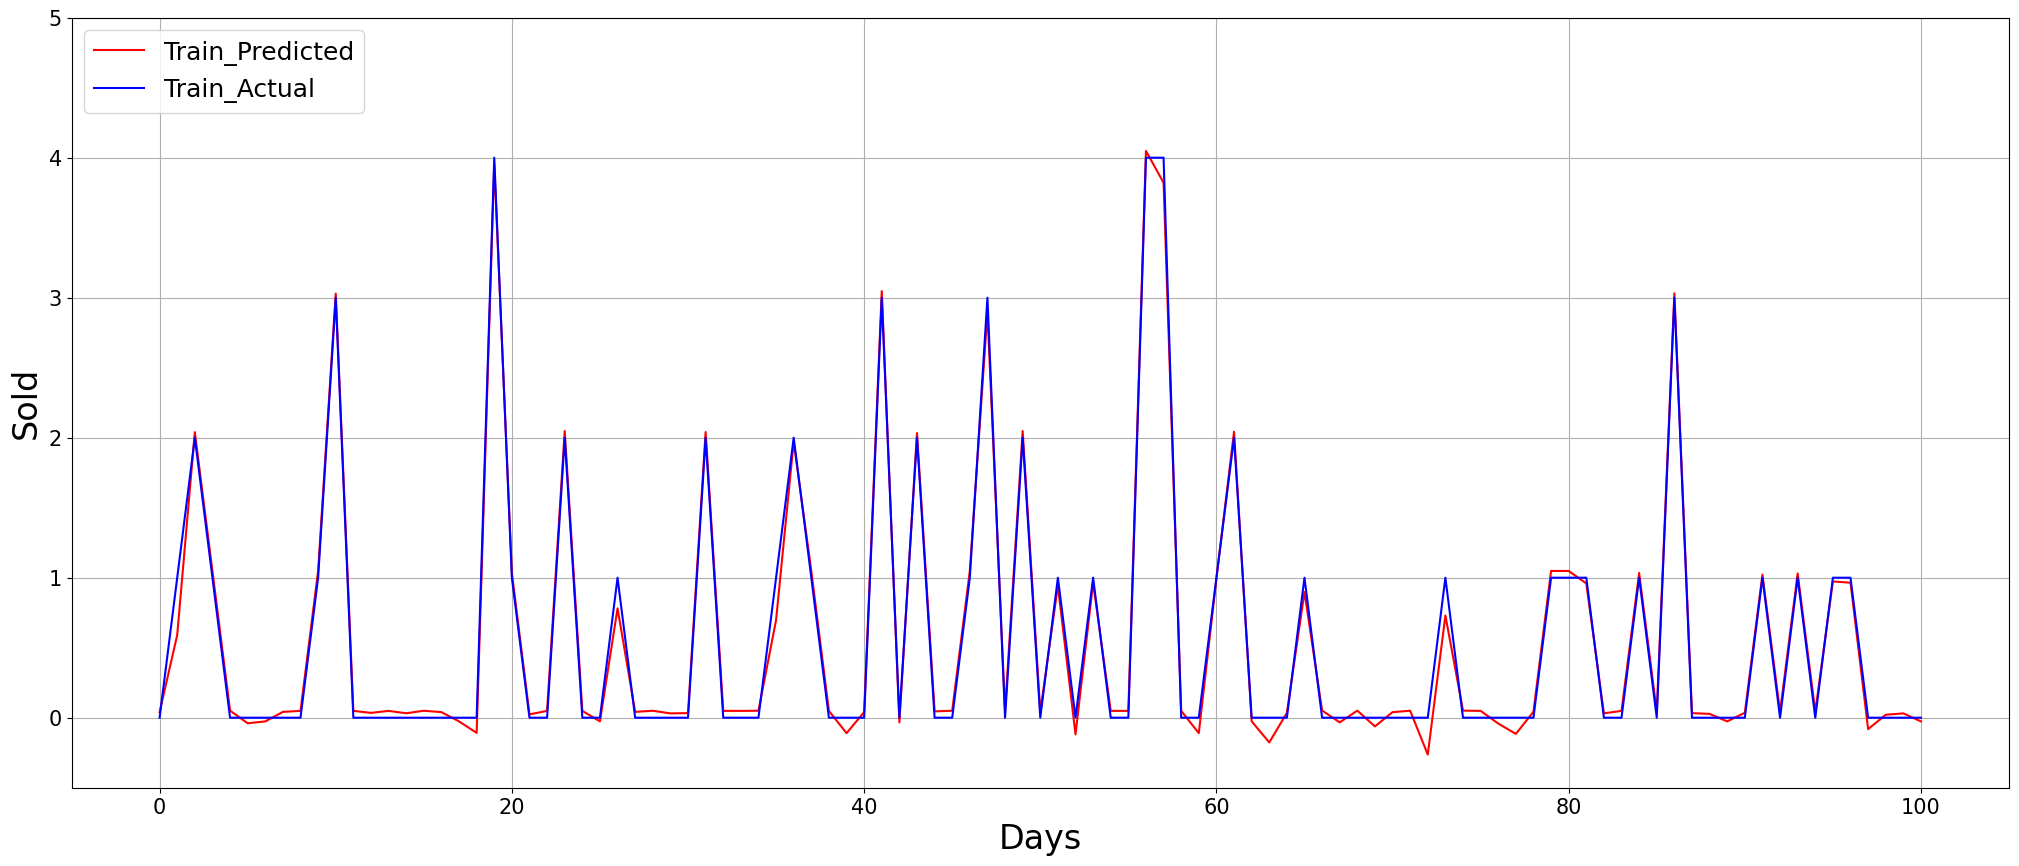

In [ ]:
x_range_ma = range(len(y_train_pred_ma[0:101]))
plt.figure(figsize = (25,10))
plt.plot(x_range_ma[0:101],y_train_pred_ma[0:101], color = "red", label = "Train_Predicted")
plt.plot(x_range_ma,y_train_ma[0:101], color = "blue", label = "Train_Actual")
plt.grid(True)
plt.legend(loc = "upper left",fontsize = "18")
plt.xlabel("Days", size = "24")
plt.ylabel('Sold',size = "24")
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.ylim(-0.5,5)
plt.show()

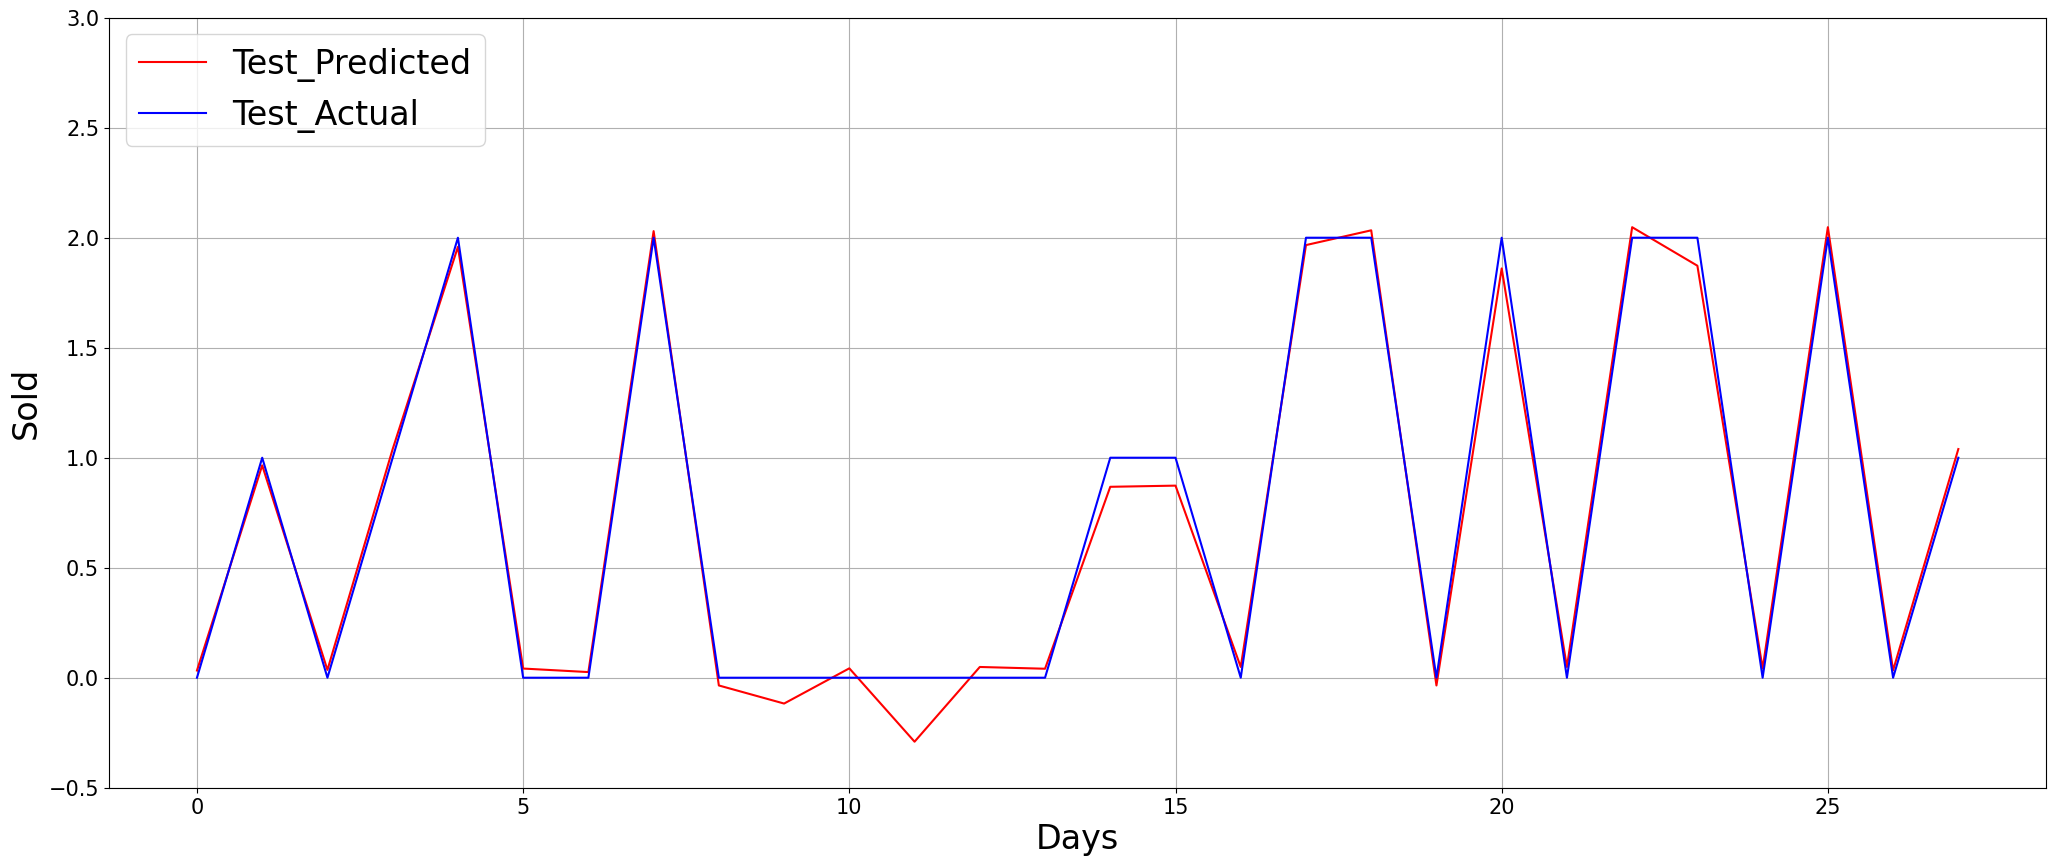

In [ ]:
x_range_ma_test = range(len(y_test_pred_ma))
plt.figure(figsize = (25,10))
plt.plot(x_range_ma_test,y_test_pred_ma, color = "red", label = "Test_Predicted")
plt.plot(x_range_ma_test,y_test_ma, color = "blue", label = "Test_Actual")
plt.grid(True)
plt.legend(loc = "upper left",fontsize = "24")
plt.xlabel("Days", size = "24")
plt.ylabel('Sold',size = "24")
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.ylim(-0.5,3)
plt.show()

In [ ]:
rmse_ma_train = sqrt(mean_squared_error(y_train_pred_ma,y_train_ma))
rmse_ma_test = sqrt(mean_squared_error(y_test_pred_ma,y_test_ma))
mse_ma_train = mean_squared_error(y_train_pred_ma,y_train_ma)
mse_ma_test = mean_squared_error(y_test_pred_ma,y_test_ma)
mae_ma_train = mean_absolute_error(y_train_pred_ma,y_train_ma)
mae_ma_test = mean_absolute_error(y_test_pred_ma,y_test_ma)
print(rmse_ma_train)
print(rmse_ma_test)
print(mse_ma_train)
print(mse_ma_test)
print(mae_ma_train)
print(mae_ma_test)

0.06610231285848543
0.08496983788305985
0.004369515765241089
0.007219873349873473
0.05258654259335094
0.06405685642921134


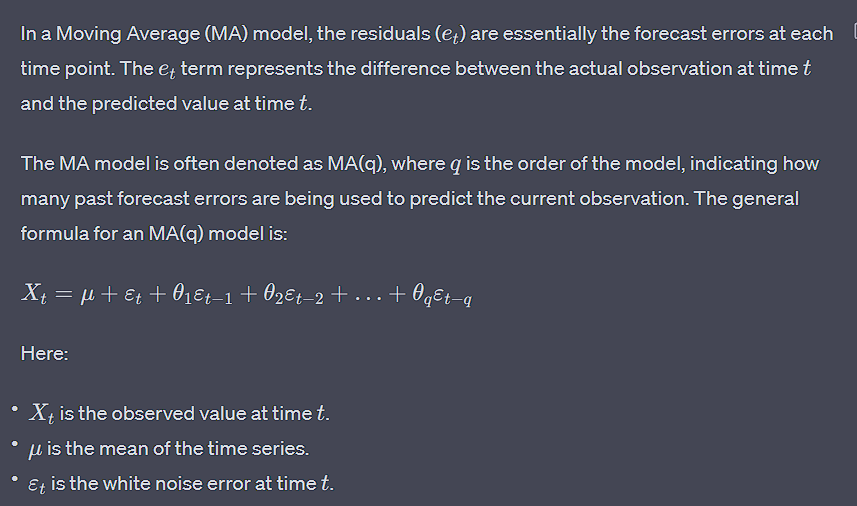


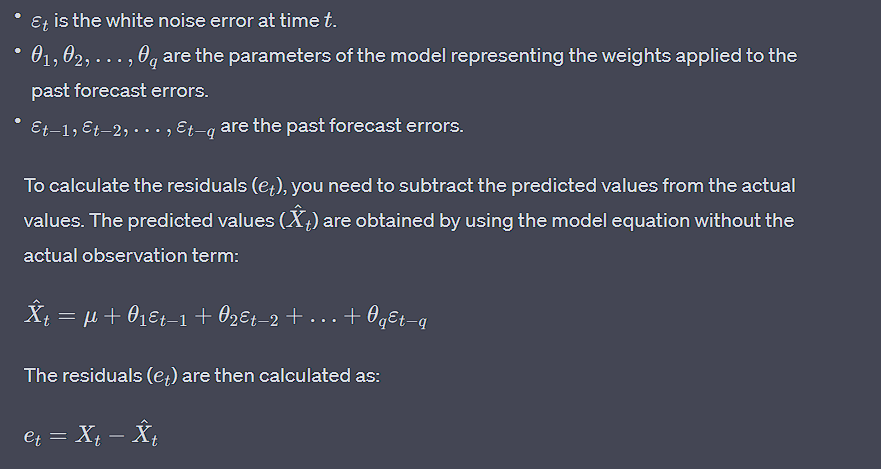

# Prediction using ARMA model

In [ ]:
# as the series is stationary there is no use of differencing therefore the order of I will be zero.
# Just adding the columns of the AR and MA model
df_ar_sliced = df_model_final.iloc[17:,] # getting the final dataframe that was divided into training and testing for AR
df_ar_sliced

,Lag_16,Lag_25
952,0.0,0.0
953,1.0,0.0
954,0.0,2.0
955,2.0,0.0
956,1.0,2.0
...,...,...
1936,2.0,2.0
1937,0.0,2.0
1938,0.0,0.0
1939,0.0,1.0


In [ ]:
df1_reset = df_ar_sliced.reset_index(drop=True)
df2_reset = df_model_final_ma.reset_index(drop=True)
df_final_arima = pd.concat([df1_reset,df2_reset],axis = 1)
df_final_arima.dropna(inplace =True)
df_final_arima

,Lag_16,Lag_25,Lag1_0,Lag1_25,d
0,0.0,0.0,-0.452952,-0.547084,d_961
1,1.0,0.0,0.096270,-0.528082,d_962
2,0.0,2.0,1.452916,0.452916,d_963
3,2.0,0.0,0.547048,-0.452952,d_964
4,1.0,2.0,-0.641216,1.547048,d_965
...,...,...,...,...,...
976,2.0,0.0,1.208525,1.264652,d_1937
977,0.0,0.0,-0.641216,1.452916,d_1938
978,1.0,1.0,1.547048,-0.452952,d_1939
979,0.0,2.0,-0.547084,0.377786,d_1940


In [ ]:
m3 = len((df_final_arima.iloc[:,0]).values)
n3 = m3 - 28

In [ ]:
df_model_final_train_arima = df_final_arima.iloc[:n3,].drop(columns = ['d'])
df_model_final_test_arima = df_final_arima.iloc[n3:,].drop(columns = ['d'])

In [ ]:
df_model_final_train_arima

,Lag_16,Lag_25,Lag1_0,Lag1_25
0,0.0,0.0,-0.452952,-0.547084
1,1.0,0.0,0.096270,-0.528082
2,0.0,2.0,1.452916,0.452916
3,2.0,0.0,0.547048,-0.452952
4,1.0,2.0,-0.641216,1.547048
...,...,...,...,...
948,0.0,0.0,3.114393,2.283654
949,0.0,1.0,-0.452952,-0.452952
950,3.0,1.0,-0.452952,-0.716346
951,1.0,2.0,1.264652,2.396788


In [ ]:
df_model_final_test_arima

,Lag_16,Lag_25,Lag1_0,Lag1_25
953,1.0,0.0,-0.452952,-0.622214
954,1.0,1.0,0.377786,0.452916
955,0.0,1.0,-0.547084,0.396788
956,2.0,3.0,0.547048,-0.547084
957,0.0,0.0,1.283654,1.377786
958,0.0,0.0,-0.452952,-0.528082
959,0.0,3.0,-0.452952,-0.697344
960,0.0,1.0,1.547048,-0.641216
961,0.0,0.0,-0.528082,-0.547084
962,1.0,1.0,-0.603212,-0.622214


In [ ]:
y_train_arima = X['sold'].iloc[960:1913,].to_numpy() # see d_961 from df_final_arima
y_test_arima = X['sold'].iloc[1913:,].to_numpy()
print(len(y_train_arima))
print(len(y_test_arima))

953
28


In [ ]:
model_arima = sm.OLS(y_train_arima,sm.add_constant(df_model_final_train_arima)).fit()
print(model_arima.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.912e+04
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:09:11   Log-Likelihood:                 1238.9
No. Observations:                 953   AIC:                            -2468.
Df Residuals:                     948   BIC:                            -2443.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5426      0.003    190.147      0.0

In [ ]:
y_train_pred_arima = model_arima.predict(sm.add_constant(df_model_final_train_arima))
y_test_pred_arima = model_arima.predict(sm.add_constant(df_model_final_test_arima))
y_train_pred_arima

0      0.037903
1      0.587185
2      2.048103
3      1.043418
4      0.057795
         ...   
948    3.872415
949    0.052016
950    0.022670
951    2.043384
952    2.039588
Length: 953, dtype: float64

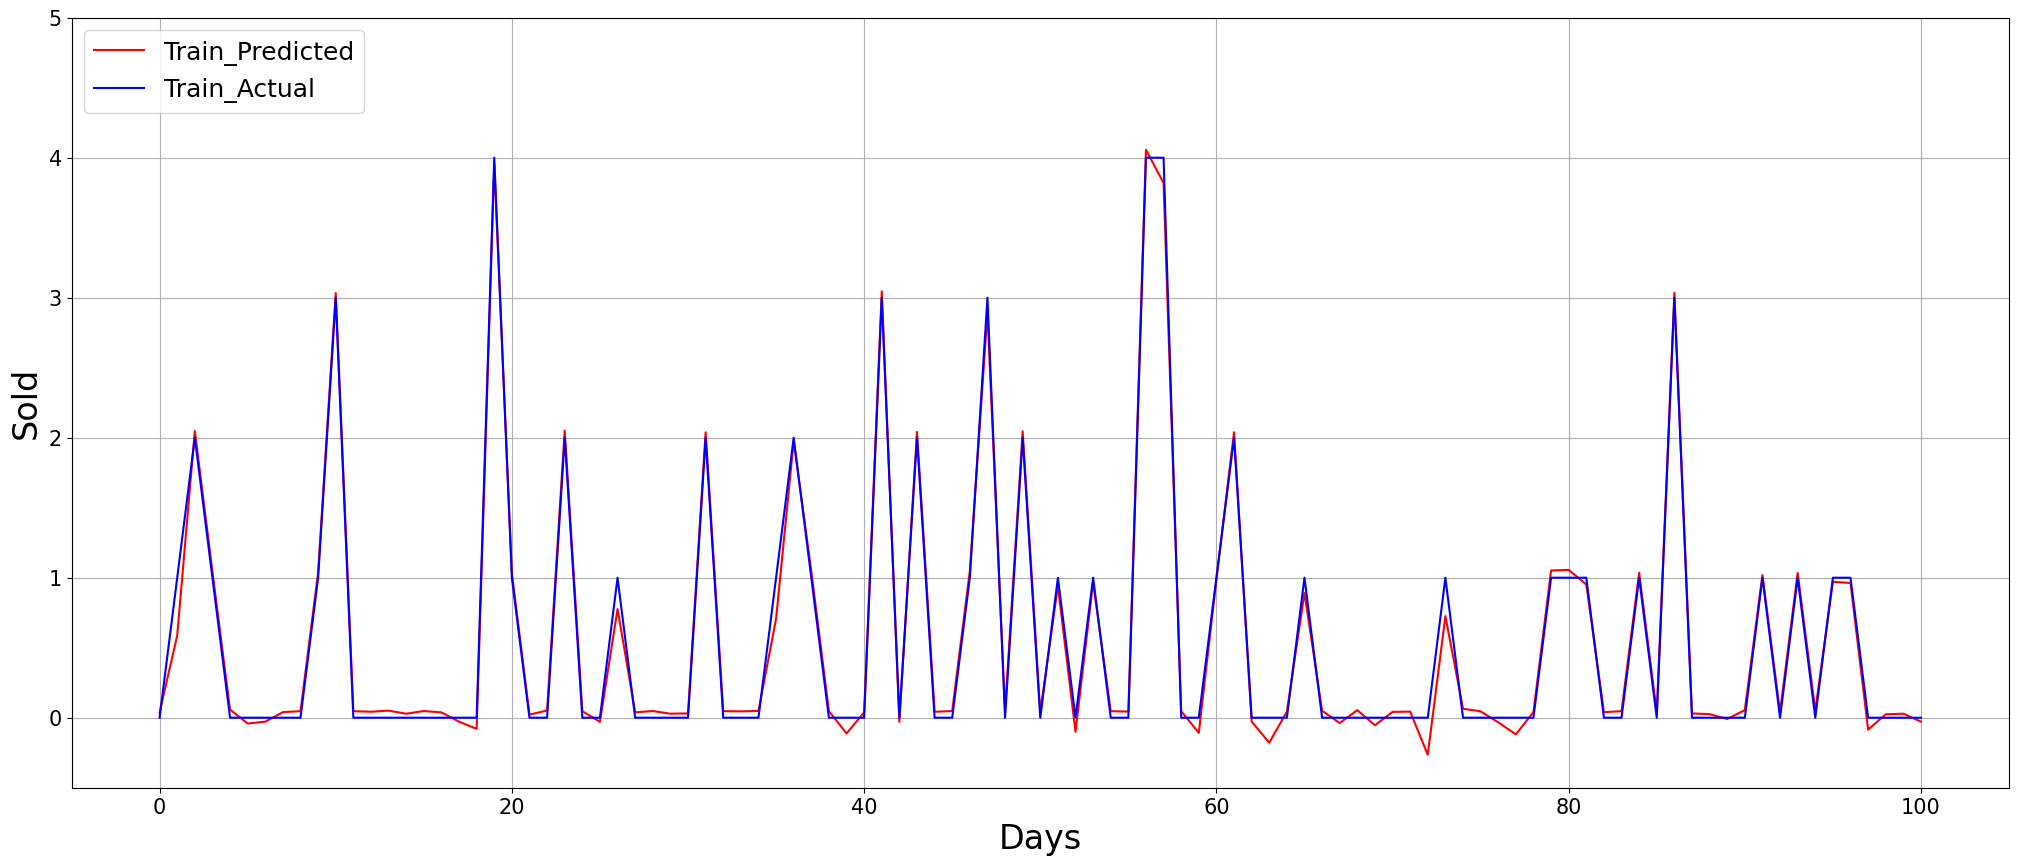

In [ ]:
x_range_arima_train = range(len(y_train_pred_arima[0:101]))
plt.figure(figsize = (25,10))
plt.plot(x_range_arima_train[0:101],y_train_pred_arima[0:101], color = "red", label = "Train_Predicted")
plt.plot(x_range_arima_train,y_train_arima[0:101], color = "blue", label = "Train_Actual")
plt.grid(True)
plt.legend(loc = "upper left",fontsize = "18")
plt.xlabel("Days", size = "24")
plt.ylabel('Sold',size = "24")
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.ylim(-0.5,5)
plt.show()

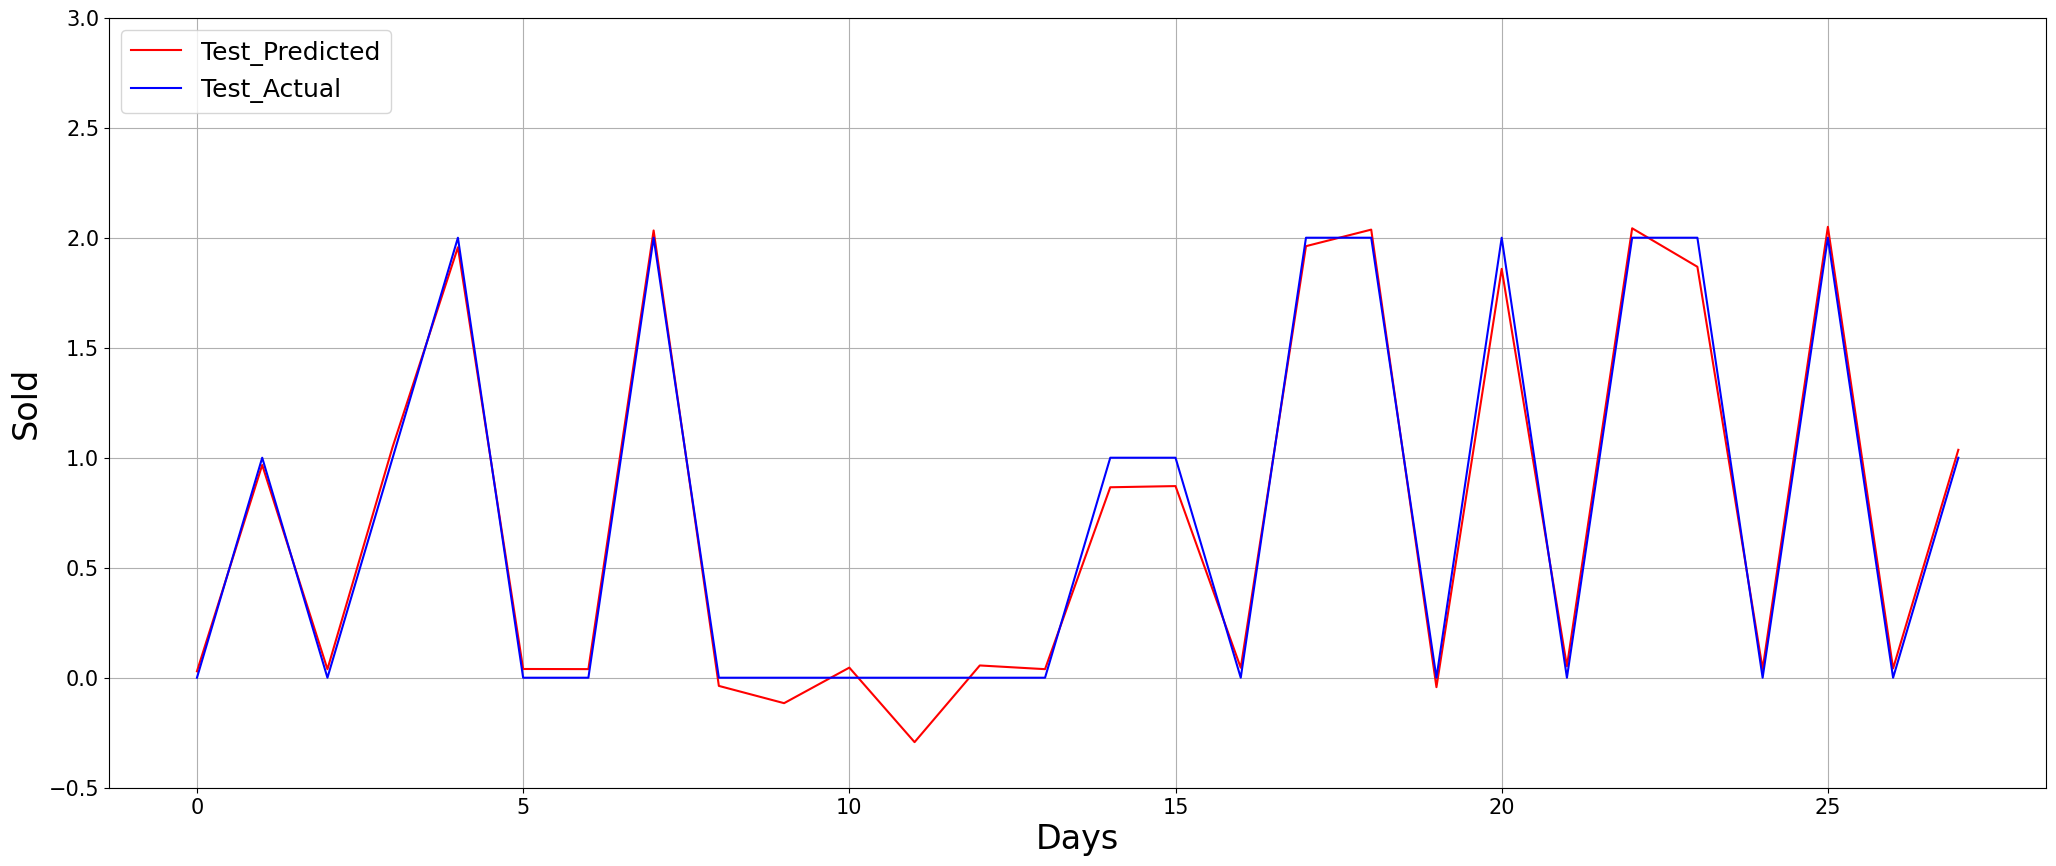

In [ ]:
x_range_arima_test = range(len(y_test_pred_arima))
plt.figure(figsize = (25,10))
plt.plot(x_range_arima_test,y_test_pred_arima, color = "red", label = "Test_Predicted")
plt.plot(x_range_arima_test,y_test_arima, color = "blue", label = "Test_Actual")
plt.grid(True)
plt.legend(loc = "upper left",fontsize = "18")
plt.xlabel("Days", size = "24")
plt.ylabel('Sold',size = "24")
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.ylim(-0.5,3)
plt.show()

In [ ]:
rmse_arima_train = sqrt(mean_squared_error(y_train_arima,y_train_pred_arima))
rmse_arima_test = sqrt(mean_squared_error(y_test_arima,y_test_pred_arima))
mse_arima_train = mean_squared_error(y_train_arima,y_train_pred_arima)
mse_arima_test =  mean_squared_error(y_test_arima,y_test_pred_arima)
mae_arima_train = mean_absolute_error(y_train_arima,y_train_pred_arima)
mae_arima_test =  mean_absolute_error(y_test_arima,y_test_pred_arima)
print(rmse_arima_train)
print(rmse_arima_test)
print(mse_arima_train)
print(mse_arima_test)
print(mae_arima_train)
print(mae_arima_test)

0.0659460833203061
0.08655829455674184
0.004348885905288756
0.007492338356571683
0.05233465522679161
0.06625466407652583
